<a href="https://colab.research.google.com/github/chirag2saraiya/Session-5/blob/master/Assignment-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2



In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


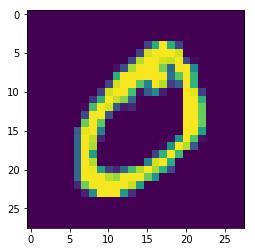

In [75]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [90]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


# create generator to standardize images
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate mean on training dataset
datagen.fit(X_train)
# prepare an iterators to scale images
train_iterator = datagen.flow(X_train, Y_train, batch_size=64)
test_iterator = datagen.flow(X_test, Y_test, batch_size=64,shuffle=False)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))

Batches train=938, test=157


In [66]:
print(Y_train[:10])
print(Y_test[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [81]:
from keras.layers import Activation

model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26 (3x3)
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Adding l2 reguralisation to each layer except last with hyper parameter value as 0.01

model.add(Convolution2D(32, 3, 3,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #24 (5x5)

#Using activation after BatchNormalisation

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1)) #24 (5x5)

model.add(MaxPooling2D(pool_size=(2, 2)))#12 (10x10)

model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))#10 (12x12)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))#8 (14x14)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))#6 (16x16)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))#4 (18x18)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4)) 
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., b

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_19 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_22 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_19 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 24, 24, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [30]:
#Mounting google drive in colab to save model and misclassified image

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [82]:

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



#We will save our trained best model on disk .. We will store the model in the HDF5 file format

filepath=F"/content/gdrive/My Drive/weights.best.hdf5"

#Saving a Keras checkpoint:
#Keras provides a set of functions called callbacks: you can think of callbacks as events that will be triggered at certain training states. 
#The callback we need for checkpointing is the ModelCheckpoint which provides all the features we need according to the checkpointing strategy we adopted in our example.

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

#Trains the model for a fixed number of epochs .
model.fit_generator(train_iterator,
          epochs=40,
          steps_per_epoch=len(train_iterator),
          verbose=1,
          validation_data= test_iterator,
          validation_steps = len(test_iterator),
          callbacks=[checkpoint]
          )



Epoch 1/40
938/938 [==============================] - 34s 37ms/step - loss: 0.7790 - acc: 0.8679 - val_loss: 0.3193 - val_acc: 0.9455

Epoch 00001: val_acc improved from -inf to 0.94550, saving model to /content/gdrive/My Drive/weights.best.hdf5
Epoch 2/40
938/938 [==============================] - 16s 17ms/step - loss: 0.2546 - acc: 0.9369 - val_loss: 0.1411 - val_acc: 0.9766

Epoch 00002: val_acc improved from 0.94550 to 0.97660, saving model to /content/gdrive/My Drive/weights.best.hdf5
Epoch 3/40
938/938 [==============================] - 16s 17ms/step - loss: 0.2109 - acc: 0.9418 - val_loss: 0.1271 - val_acc: 0.9800

Epoch 00003: val_acc improved from 0.97660 to 0.98000, saving model to /content/gdrive/My Drive/weights.best.hdf5
Epoch 4/40
938/938 [==============================] - 16s 17ms/step - loss: 0.1980 - acc: 0.9426 - val_loss: 0.1036 - val_acc: 0.9862

Epoch 00004: val_acc improved from 0.98000 to 0.98620, saving model to /content/gdrive/My Drive/weights.best.hdf5
Epoch 5

In [83]:

score = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print(score)

[0.09442473397254944, 0.9856]


In [91]:
#Now, we have trained and stored our model. It’s time to reload it and test it with the 10000 test instances:

from keras.models import load_model
from keras.preprocessing.image import save_img
from sklearn.metrics import classification_report, confusion_matrix

#Load the best saved model and create predictions on the test set

mnist_model = load_model(filepath)

probabilities = mnist_model.predict_generator(test_iterator,steps=len(test_iterator))

print(probabilities[0])
y_pred = np.argmax(probabilities, axis=1)


#See which we predicted correctly and which not

correct_indices = np.nonzero(y_pred == y_test)[0] 
incorrect_indices = np.nonzero(y_pred != y_test)[0]
print(len(correct_indices)," classified correctly") 
print(len(incorrect_indices)," classified incorrectly")





[1.08825986e-07 1.62815388e-06 1.00800162e-06 1.65427161e-06
 1.25413435e-09 1.75381402e-07 3.85339809e-15 9.99994516e-01
 2.65909890e-08 8.92129208e-07]
9919  classified correctly
81  classified incorrectly


###Observation
As you can see, we have misclassified 81 instances out of 9919, In the next code block, we will analyze such cases where we detect false labels:

/content/gdrive/My Drive/Test/0..jpg


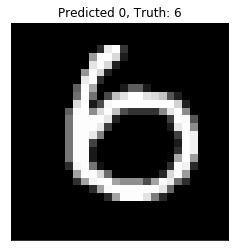

/content/gdrive/My Drive/Test/1..jpg


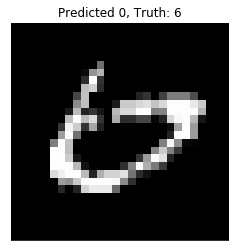

/content/gdrive/My Drive/Test/2..jpg


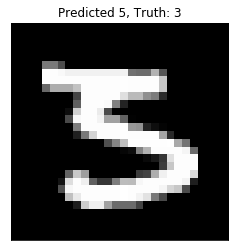

/content/gdrive/My Drive/Test/3..jpg


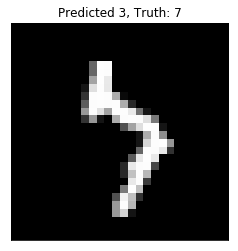

/content/gdrive/My Drive/Test/4..jpg


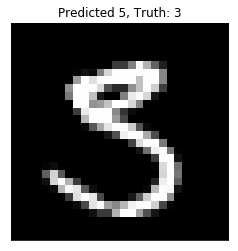

/content/gdrive/My Drive/Test/5..jpg


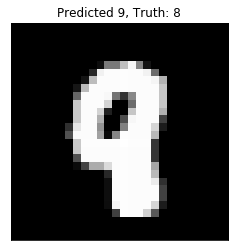

/content/gdrive/My Drive/Test/6..jpg


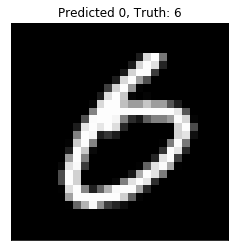

/content/gdrive/My Drive/Test/7..jpg


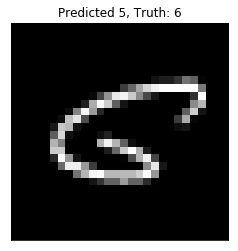

/content/gdrive/My Drive/Test/8..jpg


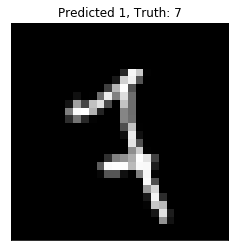

/content/gdrive/My Drive/Test/9..jpg


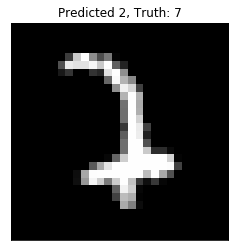

/content/gdrive/My Drive/Test/10..jpg


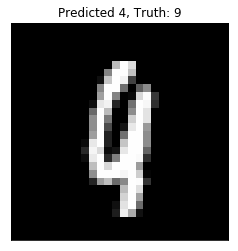

/content/gdrive/My Drive/Test/11..jpg


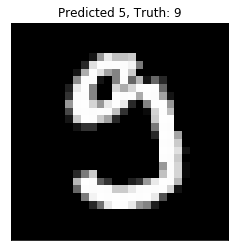

/content/gdrive/My Drive/Test/12..jpg


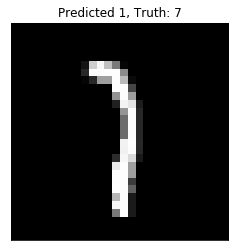

/content/gdrive/My Drive/Test/13..jpg


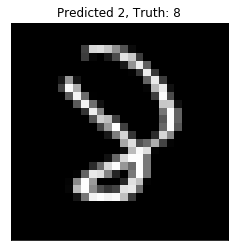

/content/gdrive/My Drive/Test/14..jpg


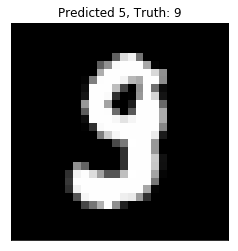

/content/gdrive/My Drive/Test/15..jpg


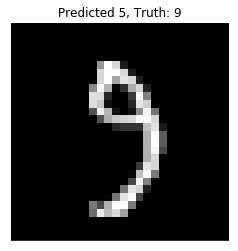

/content/gdrive/My Drive/Test/16..jpg


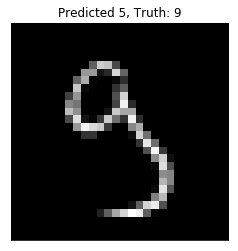

/content/gdrive/My Drive/Test/17..jpg


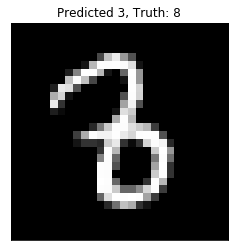

/content/gdrive/My Drive/Test/18..jpg


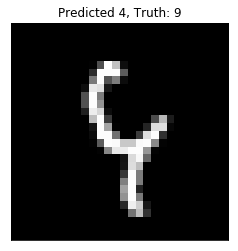

/content/gdrive/My Drive/Test/19..jpg


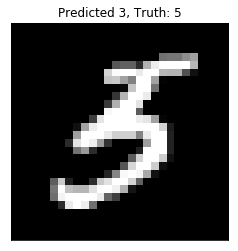

/content/gdrive/My Drive/Test/20..jpg


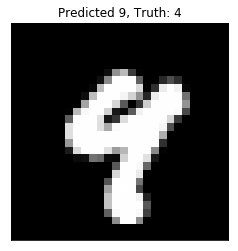

/content/gdrive/My Drive/Test/21..jpg


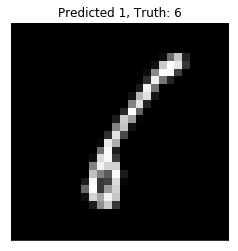

/content/gdrive/My Drive/Test/22..jpg


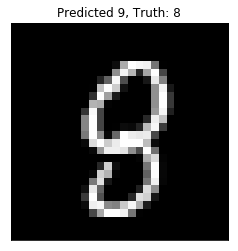

/content/gdrive/My Drive/Test/23..jpg


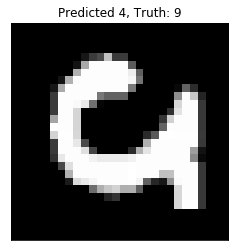

/content/gdrive/My Drive/Test/24..jpg


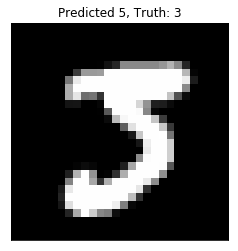

In [92]:
# plot and save 25 images incorrect predictions to Drive


for i, incorrect in enumerate(incorrect_indices[:25]):

  filepath2="{}{}.{}".format(F"/content/gdrive/My Drive/Test/",i,".jpg")
  
  print(filepath2)
  
  save_img(filepath2, X_test[incorrect])

  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')

  plt.title( "Predicted {}, Truth: {}".format(y_pred[incorrect], y_test[incorrect]))

  plt.xticks([])

  plt.yticks([])

  plt.show()